# Executive Summary

# Main Report

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn import preprocessing
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

### Reading data 

In [51]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8')  
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [52]:
data.shape

(438557, 18)

In [53]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [54]:
data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [55]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [56]:
record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

### Data Manipulation and Visualization

In [57]:
record.groupby(['STATUS']).count()['ID']

STATUS
0    383120
1     11090
2       868
3       320
4       223
5      1693
C    442031
X    209230
Name: ID, dtype: int64

In [85]:
record['Default'] = None
record['Default'][record['STATUS'] =='X']='No'
record['Default'][record['STATUS'] =='C']='No'
record['Default'][record['STATUS'] =='0']='No'
record['Default'][record['STATUS'] =='1']='No' 
record['Default'][record['STATUS'] =='2']='Yes' 
record['Default'][record['STATUS'] =='3']='Yes' 
record['Default'][record['STATUS'] =='4']='Yes' 
record['Default'][record['STATUS'] =='5']='Yes' 

<ipython-input-85-67cf2cf46409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['Default'][record['STATUS'] =='X']='No'
<ipython-input-85-67cf2cf46409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['Default'][record['STATUS'] =='C']='No'
<ipython-input-85-67cf2cf46409>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['Default'][record['STATUS'] =='0']='No'
<ipython-input-85-67cf2cf46409>:5: SettingWithCopyWarni

In [59]:
data['DEFAULT'] = record['Default']

In [60]:
data.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DEFAULT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,No


In [61]:
def plot_pie(variable, title):
    df_temp = pd.DataFrame(data.groupby([variable]).count()['ID'])
    colors = sns.color_palette('pastel')[0:data[variable].nunique()]
    plt.pie(df_temp['ID'], colors = colors, labels = df_temp.index, autopct='%.0f%%')
    plt.title(title)
    plt.show()

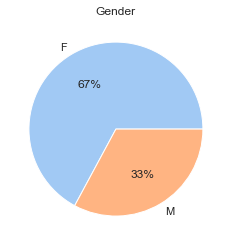

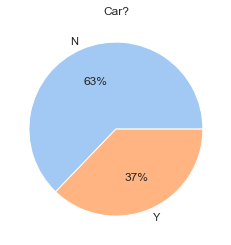

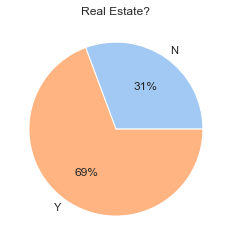

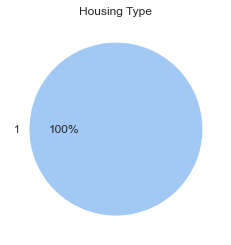

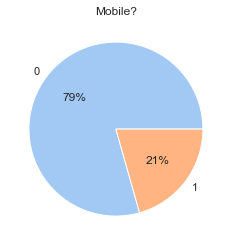

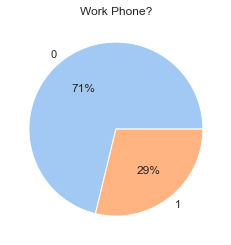

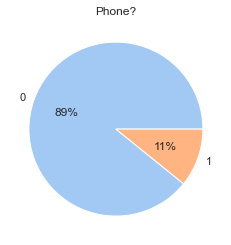

In [62]:
list_categorical = data.columns.drop(['ID', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_INCOME_TYPE', 'CNT_FAM_MEMBERS',"NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "DEFAULT"])
title = ["Gender", "Car?", "Real Estate?", "Housing Type", "Mobile?", "Work Phone?", "Phone?", "Email?", "Ocupation Type"]
cnt = 0
for variable_name in list_categorical:
    plot_pie(variable_name, title[cnt])
    cnt = cnt + 1

In [63]:
def plot_chart(variable, label, rotate_label):
    df_temp = pd.DataFrame(data.groupby([variable]).count()['ID'])
    ax = sns.barplot(x=df_temp.index, y=df_temp.ID, data=df_temp)
    ax.set_ylabel('Number of people')
    ax.set_xlabel(label)
    title = "Distribution of " + label
    ax.set_title(title)
    if rotate_label:
         plt.xticks(rotation=90)
    plt.figure()

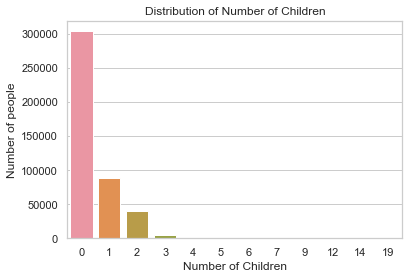

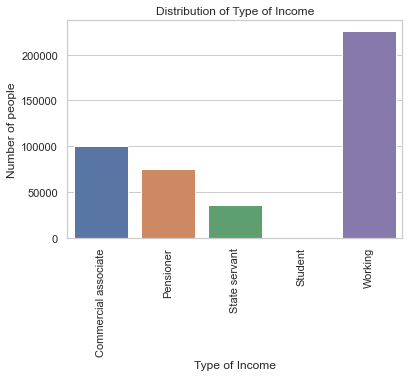

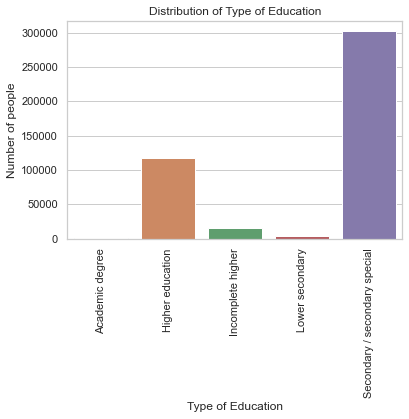

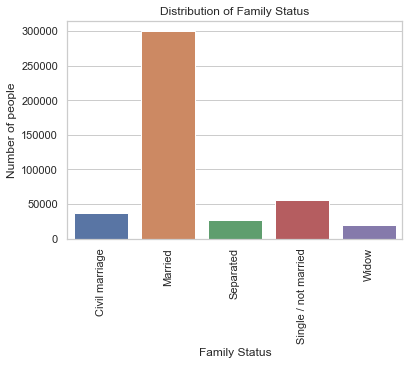

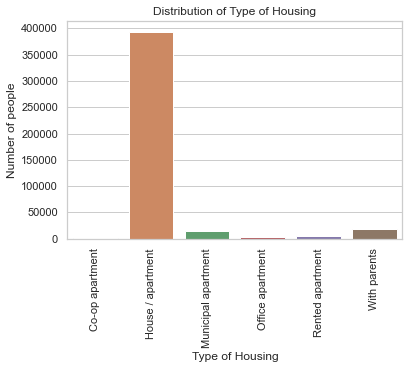

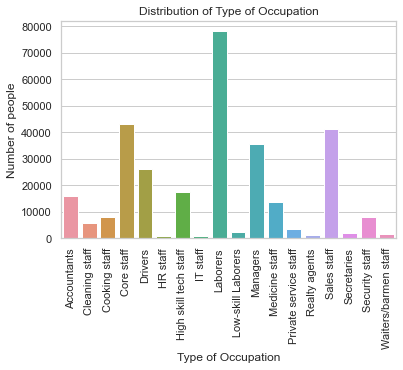

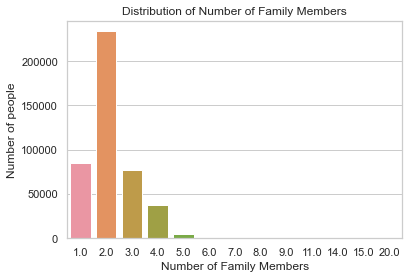

<Figure size 432x288 with 0 Axes>

In [64]:
list_categorical = data.columns.drop(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'DEFAULT'])
label = ["Number of Children", "Type of Income", "Type of Education", "Family Status", "Type of Housing", "Type of Occupation", "Number of Family Members"]
rotate_label = [False, True, True, True, True, True, False]
cnt = 0
for variable_name in list_categorical:
    plot_chart(variable_name, label[cnt], rotate_label[cnt])
    cnt = cnt + 1

In [65]:
def plot_boxplot(variable, label):
    ax = sns.boxplot(x=data[variable])
    ax.set_xlabel(label)
    title = "Distribution of " + label
    ax.set_title(title)
    plt.figure()

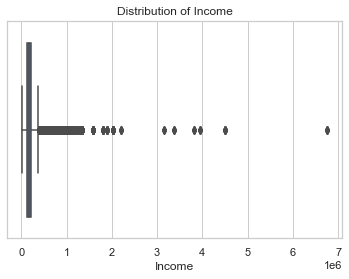

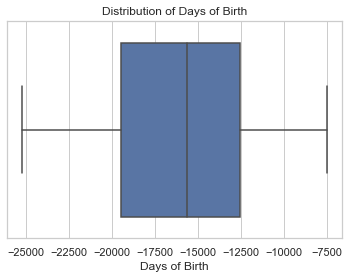

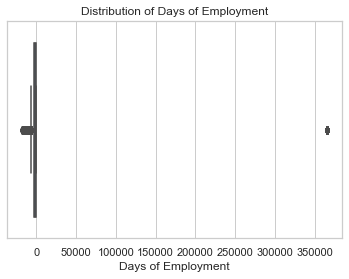

<Figure size 432x288 with 0 Axes>

In [66]:
list_categorical = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
label = ['Income', 'Days of Birth', 'Days of Employment']
cnt = 0
for variable_name in list_categorical:
    plot_boxplot(variable_name, label[cnt])
    cnt = cnt + 1

In [67]:
list_categorical = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
for variable in list_categorical:
    q_low = data[variable].quantile(0.01)
    q_hi  = data[variable].quantile(0.99)
    data = data[(data[variable] < q_hi) & (data[variable] > q_low)]

In [68]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.471130e+05,347113.000000,347113.000000,347113.000000,347113.000000,347113.0,347113.000000,347113.000000,347113.000000,347113.000000
mean,6.022479e+06,0.517100,188454.664889,-14800.542774,-2521.079432,1.0,0.247680,0.285025,0.117541,2.304080
std,5.705920e+05,0.768438,82518.901957,3404.002414,2151.561385,0.0,0.431666,0.451427,0.322064,0.927912
min,5.008804e+06,0.000000,54027.000000,-23977.000000,-10932.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.610221e+06,0.000000,135000.000000,-17358.000000,-3462.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047939e+06,0.000000,180000.000000,-14553.000000,-1921.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.448822e+06,1.000000,225000.000000,-11983.000000,-918.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,531000.000000,-8569.000000,-12.000000,1.0,1.000000,1.000000,1.000000,20.000000


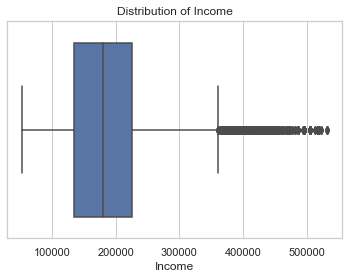

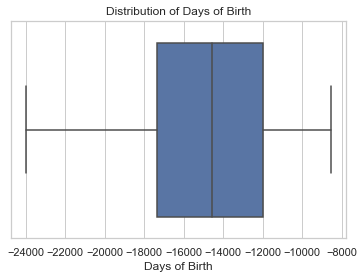

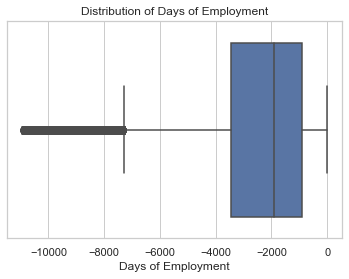

<Figure size 432x288 with 0 Axes>

In [69]:
list_categorical = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
label = ['Income', 'Days of Birth', 'Days of Employment']
cnt = 0
for variable_name in list_categorical:
    plot_boxplot(variable_name, label[cnt])
    cnt = cnt + 1

In [70]:
def plot_histogram(variable, label):
    ax = sns.histplot(data=data, x=variable)
    ax.set_xlabel(label)
    title = "Distribution of " + label
    ax.set_title(title)
    plt.figure()

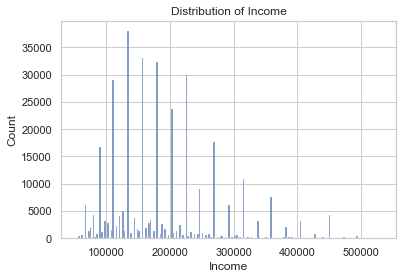

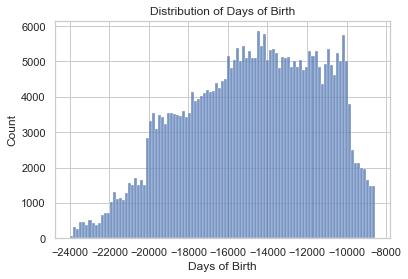

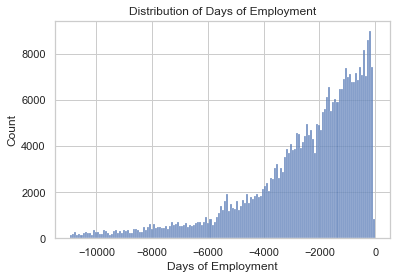

<Figure size 432x288 with 0 Axes>

In [71]:
list_categorical = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
label = ['Income', 'Days of Birth', 'Days of Employment']
cnt = 0
for variable_name in list_categorical:
    plot_histogram(variable_name, label[cnt])
    cnt = cnt + 1

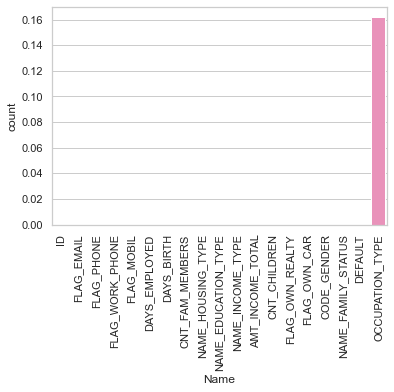

In [72]:
missing_values = data.isnull().sum() / len(data)
#missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [73]:
data['AMT_INCOME_TOTAL'] = np.log(data['AMT_INCOME_TOTAL'])
data['DAYS_EMPLOYED'] = -1 * data['DAYS_EMPLOYED']
data['DAYS_EMPLOYED'] = np.log(data['DAYS_EMPLOYED'])

In [74]:
data.loc[:, data.columns == 'AMT_INCOME_TOTAL'] = preprocessing.scale(data.loc[:, data.columns  == 'AMT_INCOME_TOTAL'], axis=0)
data.loc[:, data.columns == 'DAYS_BIRTH'] = preprocessing.scale(data.loc[:, data.columns  == 'DAYS_BIRTH'], axis=0)
data.loc[:, data.columns == 'DAYS_EMPLOYED'] = preprocessing.scale(data.loc[:, data.columns  == 'DAYS_EMPLOYED'], axis=0)

In [75]:
data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0], inplace=True)

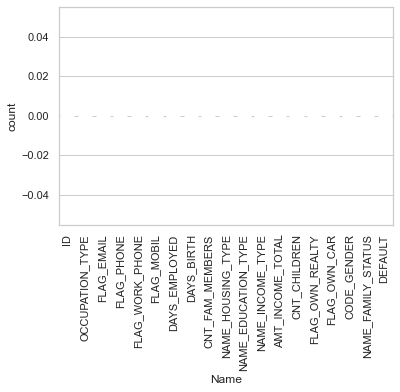

In [76]:
missing_values = data.isnull().sum() / len(data)
#missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [77]:
X, y = data.drop(['DEFAULT', 'ID'], axis = 1), data['DEFAULT']
X = pd.get_dummies(X, drop_first=True)
oversample = SMOTE()
#X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
#y.values.unique()

In [78]:
y

0         No
1         No
2         No
3         No
4         No
          ..
438544    No
438547    No
438548    No
438553    No
438556    No
Name: DEFAULT, Length: 347113, dtype: object

### Data Modeling 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train = (y_train == 'Yes') 
y_test = (y_test == 'Yes')

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", max_iter = 1000, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# svm_clf = SVC(gamma="scale", random_state=42)
# neigh_clf = KNeighborsClassifier(n_neighbors=3)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('sgd', sgd_clf), ('dt', dt_clf)],
    voting='hard') # hard voting


voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='soft') # soft voting


In [ ]:
#neigh_clf is left unused
cnt = 0
for clf in (log_clf, rnd_clf, sgd_clf, dt_clf, voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if cnt == 4:
        subtype = "(Hard)"
    elif cnt == 5:
        subtype = "(Soft)"
    else:
        subtype = ""
    cnt = cnt + 1
    print(clf.__class__.__name__, ":", subtype)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))

In [43]:
bag_clf1 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

bag_clf2 = BaggingClassifier(
    LogisticRegression(solver="lbfgs", max_iter = 1000, random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

bag_clf3 = BaggingClassifier(
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

bag_clf4 = BaggingClassifier(
    RandomForestClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)


classifiers = ["Decision Tree", "Logistic Regression", "Random Forest", "SGD Classifier", "Random Forest"]

BaggingClassifier : 
Accuracy:  0.6993857961027438
Precision:  0.0056220598921482385
Recall:  0.6282051282051282
F1 Score:  0.011144384215912967
